# Exploration 07
## 프로젝트 : 스티커 만들기

===========================================================================

## 목차

### 1. 사진 불러오기
### 2. 사진 전처리하기
### 2.1 랜드마크 모델 불러오기
### 3. Project : 스티커 적용하기
### 3.1 Mini project : 고양이 수염 스티커 적용하기
### 3.2 Mini project : 안경 스티커 적용하기
### 3.3 Mini project : 담배 스티커 적용하기
### 4. 모델을 쉽게 만들어 보자!
### 4.1 모델 이곳 저곳 적용해보기
### 5. 회고
### 6. Reference
### 7. 자기다짐 및 아쉬운 점

---

## 루브릭 달성 조건
- 1. 자기만의 카메라앱 기능 구현을 완수하였다.
   - 얼굴 영역과 랜드마크를 정확하게 검출하고, 스티커 사진을 합성시키는데 성공하였다.
- 2. 스티커 이미지를 정확한 원본 위치에 반영하였다.
   - 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.
- 3. 카메라 스티커앱을 다양한 원본 이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.
   - 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.

---
## 1. 사진 불러오기

In [1]:
# 필요한 모듈들을 import 하겠습니다.

import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

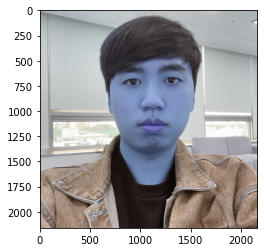

In [2]:
# 이미지를 불러오겠습니다.

image_path = './camera_sticker/images/img_00.JPG'
img_bgr = cv2.imread(image_path)
plt.imshow(img_bgr)
plt.show()

- 이미지를 불러왔습니다. 근데 파란색이군요!
- cv2의 특성상 이미지를 RGB가 아닌 BGR의 형태로 불러오기 때문에 이렇게 나오는것을 알 수 있습니다.

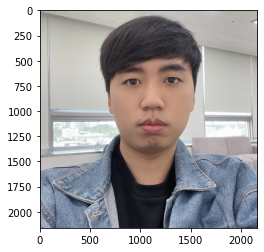

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_rgb.copy()
plt.imshow(img_rgb)
plt.show()

- cv2.COLOR_BGR2RGB 를 이용하여 BGR인 원 이미지를 RGB 형태로 변환하여 주었습니다.
  
  
- 또한 뒤에서 랜드마크나 얼굴 사각형을 그릴 때 쓸 show 이미지를 생성해주었습니다.

---
## 2. 사진 전처리하기

In [4]:
hog = dlib.get_frontal_face_detector()
rects = hog(img_rgb, 1)

- dlib에 내장된 get_frontal_face_detector() 함수를 이용하여 hog 변수에 적용하였습니다.
  
- hog 변수에 원 이미지를 담아서 얼굴의 위치를 찾아주도록 하겠습니다.

#### Face Detection
- 여기선 dlib의 2가지 모듈을 이용한다.
    - HOG(Histogram of Oriented Gradients)
       - 이미지에서의 색상 변화량을 나타내는 것.
       
       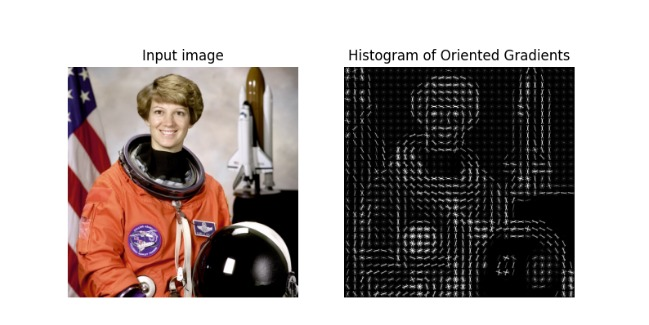
    - SVM(Surport vector machine) 2가지를 사용한다.
    
    

- 얼굴 위치를 찾을땐 __sliding window__ 를 사용한다.
  
  
- Sliding window란 작은 영역을 이동해가며 확인하는 방법이다.
   - 큰 이미지의 작은 영역을 잘라 얼굴이 있는지 확인하고, 다시 작은 영역을 옆으로 옮겨 확인하는 방식
   - 단점으로는 이미지가 클수록 오래걸린다.
   
   
- hog 의 2번째 파라미터는 이미지 피라미드 수이다.
   - 이미지 피라미드란 __upsampling__ 을 통해 크기를 키우는 것
       - upsampling 이란?
           - 간단하게 데이터의 크기를 키우는 것입니다. 일반적으로 CNN의 레이어를 통과하면서 이미지의 크기를 줄이는 것을 down sampling이라고 하는데, down sampling의 반대 개념이 upsampling인 셈이죠.

rectangles[[(617, 405) (1575, 1363)]]


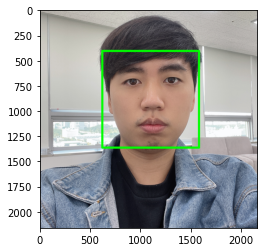

In [5]:
print(rects)

for rect in rects:
    left = rect.left() # 왼쪽
    right = rect.right() # 오른쪽
    top = rect.top() # 위쪽
    bottom = rect.bottom() # 아래쪽
    
    cv2.rectangle(img_show, (left,top), (right,bottom), (0,255,0), 20, lineType = cv2.LINE_AA)
    # 시작점의 좌표와 종료점의 좌표로 직각 사각형을 그림

plt.imshow(img_show)
plt.show()

- 자 얼굴을 찾았습니다! 각각 시작점의 좌표가 왼쪽, 위, 오른쪽, 아래 순으로 사각형이 그려졌습니다.

In [6]:
print(rects)
print('왼쪽 좌표: ', left)
print('위쪽 좌표: ', top)
print('오른쪽 좌표: ', right)
print('아래쪽 좌표: ', bottom)

rectangles[[(617, 405) (1575, 1363)]]
왼쪽 좌표:  617
위쪽 좌표:  405
오른쪽 좌표:  1575
아래쪽 좌표:  1363


- 각각 좌표를 확인해보았습니다.

---
### 2.1 랜드마크 모델 불러오기
- face landmark 를 도와줄 모델을 불러오겠습니다.
- 여기서 사용할 모델은 Dlib의 제공되는 모델을 사용해보겠습니다.

#### face landmark란?
- 이목구비의 위치를 추론하는 것을 __face landmark localization__ 이라고 한다.
- 이때 landmark는 detection의 결과물인 bounding box로 잘라낸(crop) 이미지를 사용한다.

#### Object keypoint estimation 알고리즘
- 객체 내부의 점을 찾는 기술을 object keypoint estimation 이라고 한다.
  
  
- keypoint를 찾는 알고리즘은 크게 2가지로 나뉜다.
   - 1. top-down : bounding box를 찾고 box 내부의 keypoint를 예측
   - 2. bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화해서 box 생성
   
   
- top-down 방식을 사용하겠습니다.

In [7]:
model_path = './camera_sticker/models/face_model_68.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []

for rect in rects:
    points = landmark_predictor(img_rgb, rect)
    list_points = list(map(lambda i:(i.x, i.y), points.parts()))
    list_landmarks.append(list_points)

- 아까 만든 사각형 rects 를 이용하여 얼굴의 landmark 위치를 points에 저장하였습니다.
- 또한 각각 landmark의 위치정보를 (x,y) 로 변환하여 list_points에 저장하였고 이를 list_landmarks 라는 리스트에 append하여 모아주었습니다.

In [9]:
print(len(list_landmarks))
print(len(list_landmarks[0]))

1
68


- list_landmarks의 숫자인 1은 얼굴이 1개라는 것을 의미합니다.
- list_landmarks[0]의 숫자인 68은 68개의 랜드마크 정보를 담고있다는 것을 의미합니다.
  
  
- landmarks 정보를 얼굴에 대입하도록 하겠습니다.

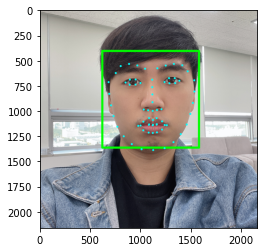

In [10]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0,255,255), -1)
        
        # cv2.circle은 OpenCV의 원을 그리는 함수
        # 크기가 2이고 (0,255,255)색으로 내부가 채워진 (-1)원을 그림
        # 마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐

plt.imshow(img_show)
plt.show()

- 잘 그려진것을 확인할 수 있습니다.

In [11]:
for dlib_rect, landmark in zip(rects, list_landmarks):
    x_nose = landmark[30][0] # 코의 index는 30 입니다
    y_nose = landmark[30][1]
    x_migan = landmark[28][0] # 미간의 인덱스는 28 입니다.
    y_migan = landmark[28][1]
    x_l_mejilla = landmark[13][0] # 왼쪽 볼의 인덱스는 13 입니다.
    y_l_mejilla = landmark[13][1]
    x_r_mejilla = landmark[3][0] # 오른쪽 볼의 인덱스는 3 입니다.
    y_r_mejilla = landmark[3][1]
    w = dlib_rect.width()
    h = dlib_rect.height()

- 랜드마크 별 위치정보

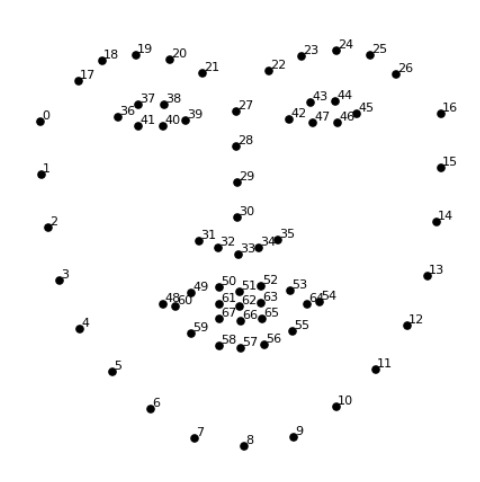

---

## 3. Project : 스티커 적용하기
---

### 3.1 Mini project : 고양이 수염 스티커 적용하기

In [12]:
sticker_path = './camera_sticker/images/cat_hair.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

- 고양이 수염 스티커를 sticker_path에 할당해주겠습니다.
- cv2를 이용해 img_sticker에 할당하고 사이즈를 얼굴 사각형의 사이즈와 맞춰서 설정해 줍니다.

In [13]:
sticker_area = img_rgb[(y_nose-h//2):(y_nose+h//2)+1, (x_nose-w//2):(x_nose+w//2)+1]

img_sample = img_rgb.copy()

img_sample[ (y_nose-h//2):(y_nose+h//2)+1, (x_nose-w//2):(x_nose+w//2)+1] = \
np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

- sticker_area는 스티커의 위치로 코를 중심으로 설정하였습니다.
- 빈 이미지를 샘플로 복사하여 그 위에 고양이 수염을 씌워보겠습니다.

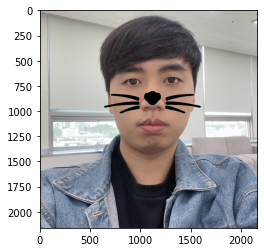

In [14]:
plt.imshow(img_sample)
plt.show()

- 잘 씌워진 것을 볼 수 있습니다.

---
### 3.2 Mini project : 안경 스티커 적용하기

In [15]:
sticker_path = './camera_sticker/images/glasses.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

- 위와 같이 glasses를 불러오겠습니다.

In [16]:
img_sample = img_rgb.copy()

sticker_area = img_sample[(y_migan-h//2):(y_migan+h//2)+1, (x_migan-w//2):(x_migan+w//2)+1]

img_sample[ (y_migan-h//2):(y_migan+h//2)+1, (x_migan-w//2):(x_migan+w//2)+1] = \
np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

- 이번엔 미간을 중심으로 설정해주었습니다.

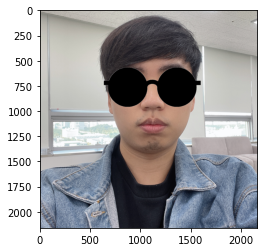

In [17]:
plt.imshow(img_sample)
plt.show()

- 잘 씌워졌군요

---
### 3.3 Mini project : 담배 스티커 적용하기

In [18]:
sticker_path = './camera_sticker/images/ciga.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
img_sticker = cv2.resize(img_sticker, (w//2,h//2))
img_sticker_flip = cv2.flip(img_sticker,1)
img_sticker_flip = cv2.resize(img_sticker_flip, (w//2,h//2))

- 이번엔 담배스티커를 적용해보겠습니다. 물론 저는 비흡연자입니다만.. 여기서는 해보겠습니다.
  
  
- 위와 다른점이라면 이미지가 너무 크기에 사이즈를 줄여주었고 왼쪽, 오른쪽 어느곳으로든 담배를 물 수 있기에 좌우반전된 스티커 이미지까지 설정해주었습니다.
  
  
- 또한 스티커가 컬러가 있어서 그런지 색깔이 BGR형태로 불러와집니다. 이또한, RGB 형태로 변환해줍니다.

In [19]:
img_sample = img_rgb.copy()

sticker_area = img_sample[(y_l_mejilla-h//4):(y_l_mejilla+h//4)+1, (x_l_mejilla-w//4):(x_l_mejilla+w//4)+1]

img_sample[(y_l_mejilla-h//4):(y_l_mejilla+h//4)+1, (x_l_mejilla-w//4):(x_l_mejilla+w//4)+1] = \
np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

- 기본 이미지를 붙여넣어 보겠습니다. 이번엔 왼쪽 볼을 기준으로 잡았습니다.
- 사진의 중심을 기준으로 잡다보니 살짝 오설정하여 볼에 입에 닿게끔 만들어봤습니다.

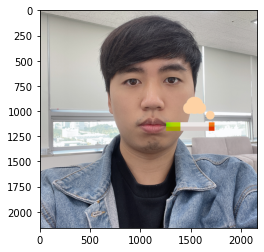

In [20]:
plt.imshow(img_sample)
plt.show()

- 담배를 잘 피고있군요.. 하지만 뭔가 이상한점이 있기는 합니다.
- 색깔이 살짝 이상합니다. BGR2RGB를 통해 RGB로 바꿔주었지만 배경을 제거하는 과정에서 np.where 부분에서 색깔의 변질이 온듯합니다.
- 이건 공부해봤지만 어떻게 변환하는지 찾지 못했습니다..
- rotation 또한 봤지만 스티커뿐 아니라 사진까지 찢어지듯 회전이 되어 제외하게 되었습니다.

In [21]:
img_sample = img_rgb.copy()

sticker_area = img_sample[(y_r_mejilla-h//4):(y_r_mejilla+h//4)+1, (x_r_mejilla-w//4):(x_r_mejilla+w//4)+1]

img_sample[(y_r_mejilla-h//4):(y_r_mejilla+h//4)+1, (x_r_mejilla-w//4):(x_r_mejilla+w//4)+1] = \
np.where(img_sticker_flip==255,sticker_area,img_sticker_flip).astype(np.uint8)

- 이번엔 반대로 물어보겠습니다.

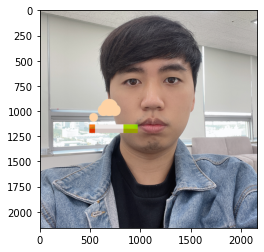

In [22]:
plt.imshow(img_sample)
plt.show()

- 잘 된걸 볼 수 있습니다.

---
## 4. 모델을 쉽게 만들어 보자!

- 모델을 좀 더 쉽고 간편하게 사용할 수 있도록 클래스화 해주도록 하겠습니다.
- 아직 코딩실력이 모자라 아까 썼던 코드의 함축밖에 되지는 않지만 그래도 간편하게 만들어 보았습니다.

In [23]:
class sticker:  
    def cat(self, image_path, model_path, sticker_path):
        import os
        import cv2
        import matplotlib.pyplot as plt
        import numpy as np
        import dlib
        
        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        img_sample = img_rgb.copy()
        hog = dlib.get_frontal_face_detector()
        rects = hog(img_rgb, 1)
    
        for rect in rects:
            l = rect.left()
            r = rect.right()
            t = rect.top()
            b = rect.bottom()
            cv2.rectangle(img_sample, (l,t),(r,b),(0,255,0), 15)
    
        landmark_predictor = dlib.shape_predictor(model_path)
        list_landmarks = []
    
        for rect in rects:
            points = landmark_predictor(img_rgb, rect)
            list_points = list(map(lambda i:(i.x, i.y), points.parts()))
            list_landmarks.append(list_points)
        
        for landmark in list_landmarks:
            for point in landmark:
                cv2.circle(img_sample, point, 10, (0,255,255), -1)
            
        for rect, landmark in zip(rects, list_landmarks):
            x_nose = landmark[30][0]
            y_nose = landmark[30][1]
            w = rect.width()
            h = rect.height()
        
        if w % 2 == 0:
            w = w
        elif w % 2 == 1:
            w = w-1
        
        if h % 2 == 0:
            h = h     
        elif h % 2 == 1:
            h = h-1
        
        img_sticker = cv2.imread(sticker_path)
        img_sticker = cv2.resize(img_sticker, (w,h))
    
        sticker_area = img_rgb[(y_nose-h//2):(y_nose+h//2), (x_nose-w//2):(x_nose+w//2)]
    
        print_img = img_rgb.copy()
    
        print_img[(y_nose-h//2):(y_nose+h//2), (x_nose-w//2):(x_nose+w//2)]= np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
    
        plt.imshow(print_img)
        plt.show()
        
    def glasses(self, image_path, model_path, sticker_path):
        import os
        import cv2
        import matplotlib.pyplot as plt
        import numpy as np
        import dlib
        
        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        img_sample = img_rgb.copy()
        hog = dlib.get_frontal_face_detector()
        rects = hog(img_rgb, 1)
    
        for rect in rects:
            l = rect.left()
            r = rect.right()
            t = rect.top()
            b = rect.bottom()
            cv2.rectangle(img_sample, (l,t),(r,b),(0,255,0), 15)
    
        landmark_predictor = dlib.shape_predictor(model_path)
        list_landmarks = []
    
        for rect in rects:
            points = landmark_predictor(img_rgb, rect)
            list_points = list(map(lambda i:(i.x, i.y), points.parts()))
            list_landmarks.append(list_points)
        
        for landmark in list_landmarks:
            for point in landmark:
                cv2.circle(img_sample, point, 10, (0,255,255), -1)
            
        for rect, landmark in zip(rects, list_landmarks):
            x_migan = landmark[28][0]
            y_migan = landmark[28][1]
            w = rect.width()
            h = rect.height()
        
        if w % 2 == 0:
            w = w
        elif w % 2 == 1:
            w = w-1
        
        if h % 2 == 0:
            h = h     
        elif h % 2 == 1:
            h = h-1        
        
        img_sticker = cv2.imread(sticker_path)
        img_sticker = cv2.resize(img_sticker, (w,h))
    
        sticker_area = img_rgb[(y_migan-h//2):(y_migan+h//2), (x_migan-w//2):(x_migan+w//2)]
    
        print_img = img_rgb.copy()
    
        print_img[(y_migan-h//2):(y_migan+h//2), (x_migan-w//2):(x_migan+w//2)]= np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
    
        plt.imshow(print_img)
        plt.show()
        
    def ciga_left(self, image_path, model_path, sticker_path):
        import os
        import cv2
        import matplotlib.pyplot as plt
        import numpy as np
        import dlib
        
        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        img_sample = img_rgb.copy()
        hog = dlib.get_frontal_face_detector()
        rects = hog(img_rgb, 1)
    
        for rect in rects:
            l = rect.left()
            r = rect.right()
            t = rect.top()
            b = rect.bottom()
            cv2.rectangle(img_sample, (l,t),(r,b),(0,255,0), 15)
    
        landmark_predictor = dlib.shape_predictor(model_path)
        list_landmarks = []
    
        for rect in rects:
            points = landmark_predictor(img_rgb, rect)
            list_points = list(map(lambda i:(i.x, i.y), points.parts()))
            list_landmarks.append(list_points)
        
        for landmark in list_landmarks:
            for point in landmark:
                cv2.circle(img_sample, point, 10, (0,255,255), -1)
            
        for rect, landmark in zip(rects, list_landmarks):
            x_l_mejilla = landmark[13][0]
            y_l_mejilla = landmark[13][1]
            w = rect.width()
            h = rect.height()
            
        if w % 2 == 0:
            w = w
        elif w % 2 == 1:
            w = w+1
        
        if h % 2 == 0:
            h = h     
        elif h % 2 == 1:
            h = h+1
        
        img_sticker = cv2.imread(sticker_path)
        img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
        img_sticker = cv2.resize(img_sticker, (w//2,h//2))
        img_sticker_flip = cv2.flip(img_sticker,1)
    
        sticker_area = img_rgb[(y_l_mejilla-h//4):(y_l_mejilla+h//4), (x_l_mejilla-w//4):(x_l_mejilla+w//4)]
    
        print_img = img_rgb.copy()
    
        print_img[(y_l_mejilla-h//4):(y_l_mejilla+h//4), (x_l_mejilla-w//4):(x_l_mejilla+w//4)]= np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
                  
        plt.imshow(print_img)
        plt.show()
        
    def ciga_right(self, image_path, model_path, sticker_path):
        import os
        import cv2
        import matplotlib.pyplot as plt
        import numpy as np
        import dlib
        
        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        img_sample = img_rgb.copy()
        hog = dlib.get_frontal_face_detector()
        rects = hog(img_rgb, 1)
    
        for rect in rects:
            l = rect.left()
            r = rect.right()
            t = rect.top()
            b = rect.bottom()
            cv2.rectangle(img_sample, (l,t),(r,b),(0,255,0), 15)
    
        landmark_predictor = dlib.shape_predictor(model_path)
        list_landmarks = []
    
        for rect in rects:
            points = landmark_predictor(img_rgb, rect)
            list_points = list(map(lambda i:(i.x, i.y), points.parts()))
            list_landmarks.append(list_points)
        
        for landmark in list_landmarks:
            for point in landmark:
                cv2.circle(img_sample, point, 10, (0,255,255), -1)
            
        for rect, landmark in zip(rects, list_landmarks):
            x_r_mejilla = landmark[3][0]
            y_r_mejilla = landmark[3][1]
            w = rect.width()
            h = rect.height()
            
        if w % 2 == 0:
            w = w
        elif w % 2 == 1:
            w = w+1
        
        if h % 2 == 0:
            h = h     
        elif h % 2 == 1:
            h = h+1
        
        img_sticker = cv2.imread(sticker_path)
        img_sticker = cv2.flip(img_sticker,1)        
        img_sticker = cv2.resize(img_sticker, (w//2,h//2))        
        img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
    
        print_img = img_rgb.copy()
        
        sticker_area = img_rgb[(y_r_mejilla-h//4):(y_r_mejilla+h//4), (x_r_mejilla-w//4):(x_r_mejilla+w//4)]
    
        print_img[(y_r_mejilla-h//4):(y_r_mejilla+h//4), (x_r_mejilla-w//4):(x_r_mejilla+w//4)]= np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
                  
        plt.imshow(print_img)
        plt.show()        

- 각각 {고양이수염:cat, 안경:glasses, 왼쪽으로 문 담배:ciga_left, 오른쪽으로 문 담배:ciga_right} 로 설정하였습니다.
  
  
- 조금 다른점이라면 ! img_sticker와 sticker_area의 사이즈가 일치해야지만 np.where 함수가 적용되고 스티커가 정상 적용되는 상황이 자꾸 반복되었습니다. 이떄문에 if, elif 문을 이용하여 이미지의 사이즈를 항상 짝수로 맞춰 적용할 수 있도록 하였습니다.

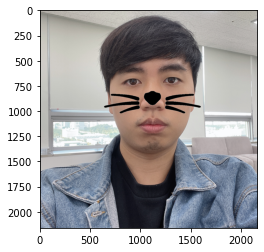

In [24]:
img_path = './camera_sticker/images/img_00.JPG'
model_path = './camera_sticker/models/face_model_68.dat'
cat_sticker_path = './camera_sticker/images/cat_hair.png'

sticker = sticker()
sticker.cat(img_path, model_path, cat_sticker_path)

- 잘 작동하는군요.

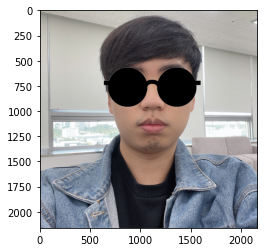

In [25]:
glasses_sticker_path = './camera_sticker/images/glasses.png'

sticker.glasses(img_path, model_path, glasses_sticker_path)

- 마찬가지로 잘 작동합니다.

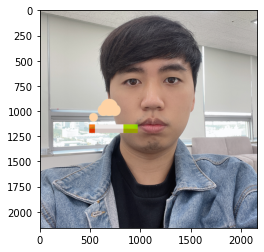

In [26]:
ciga_sticker_path = './camera_sticker/images/ciga.png'

sticker.ciga_right(img_path, model_path, ciga_sticker_path)

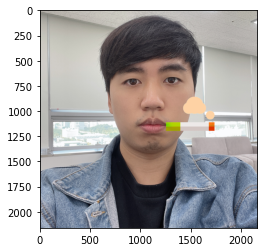

In [27]:
sticker.ciga_left(img_path, model_path, ciga_sticker_path)

- 잘 작동하는것을 확인 할 수 있습니다.

---
### 4.1 모델 이곳 저곳 적용해보기

- 이번엔 제가 아닌 다른 사진들을 활용해보겠습니다.

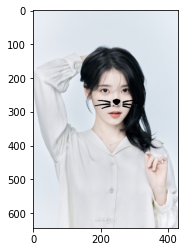

In [28]:
iu_img = './camera_sticker/images/iu.jfif'

sticker.cat(iu_img, model_path, cat_sticker_path)

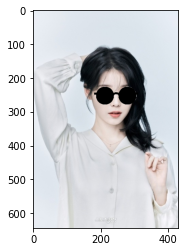

In [29]:
sticker.glasses(iu_img, model_path, glasses_sticker_path)

- 원 사진보다 훨씬 작은 사이즈에서도 잘 작동하는군요. 다른 사진도 확인해 보겠습니다.

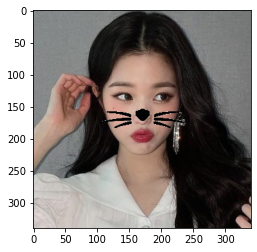

In [30]:
jang_img = './camera_sticker/images/jang.jfif'

sticker.cat(jang_img, model_path, cat_sticker_path)

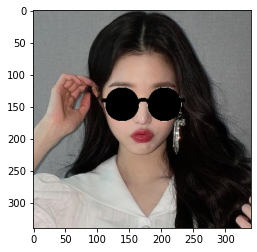

In [31]:
sticker.glasses(jang_img, model_path, glasses_sticker_path)

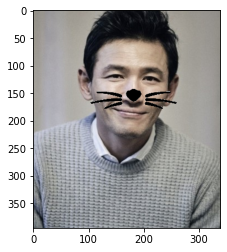

In [32]:
hwang_img = './camera_sticker/images/hwang.jfif'

sticker.cat(hwang_img, model_path, cat_sticker_path)

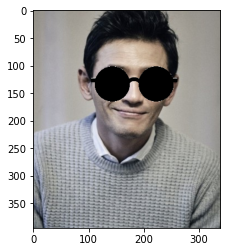

In [33]:
sticker.glasses(hwang_img, model_path, glasses_sticker_path)

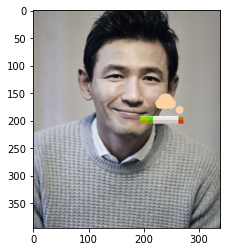

In [34]:
sticker.ciga_left(hwang_img, model_path, ciga_sticker_path)

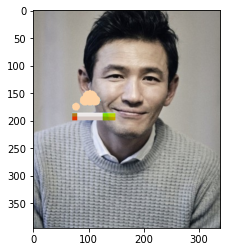

In [35]:
sticker.ciga_right(hwang_img, model_path, ciga_sticker_path)

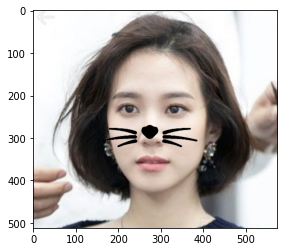

In [36]:
park_img = './camera_sticker/images/park.jpg'

sticker.cat(park_img, model_path, cat_sticker_path)

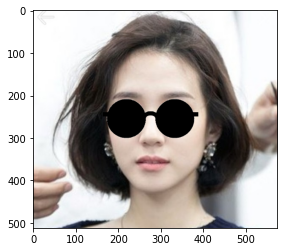

In [37]:
sticker.glasses(park_img, model_path, glasses_sticker_path)

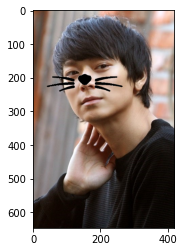

In [38]:
kang_img = './camera_sticker/images/kang.jpg'

sticker.cat(kang_img, model_path, cat_sticker_path)

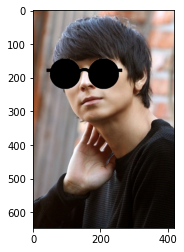

In [39]:
sticker.glasses(kang_img, model_path, glasses_sticker_path)

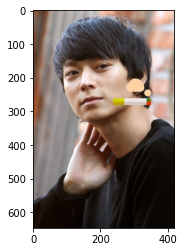

In [40]:
sticker.ciga_left(kang_img, model_path, ciga_sticker_path)

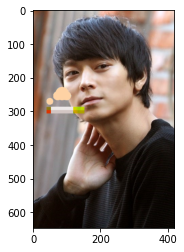

In [41]:
sticker.ciga_right(kang_img, model_path, ciga_sticker_path)

- 결과가.. 처참합니다.. 각각 이미지별로 랜드마크 재설정해서 조정해준다면 가능하겠지만 한번에 모든 사진들에 적용시킬 수 있는 클래스를 만든다는게 참 어려운 일인것 같습니다.
  
  
- 그래도 나름 밝고 정면을 보는 사진에서는 좋은 성능을 보여주나 사람마다 랜드마크의 위치가 조금씩 다르기때문에 같은 랜드마크라해도 위치가 틀리게 나오는것 같습니다.

---
## 5. 회고

### 이번 프로젝트를 하면서 어려웠던 점
>- 생각했던 것보다 전체적으로 상당히 어려웠습니다. 이미지의 색상부터 위치설정, 사용할 랜드마크, 회전, 스티커 사이즈조절, 스티커 투명도 조절 등 모든곳에서 한번씩은 막혔을만큼 상당히 어려웠습니다. 처음 해보는 것들이 많았기에 어디서부터 어떻게 건드려야할지도 막막했고.. 때문에 모든 코드를 하나 하나 뜯어보면서 공부했습니다만 마무리한 지금도 확실하게 이해가 된것같지는 않습니다.
  
### 이번 프로젝트에서 학습한 내용
>- 솔직히 이번 프로젝트는 개인적으로 학습한 내용은 크게 없는것 같습니다. 알아본 내용이라면 rotation 함수나 affine 함수 flip 함수 등 이미지의 회전, 원근법, 입체적인 회전, 상하좌우 반전 등 에 대하여 알아봤습니다. 하지만 적용법을 제대로 터득하지 못해 flip 함수를 제외하고는 적용시키지 못했습니다.
  
  
### 알아낸 점이나 모호한점
>- 이번 프로젝트에서는 거의 새로운 내용이라기보단 다시한번 코드짜는법에 대하여 다시한번 생각해보게 되었습니다. 프로젝트를 진행하던 와중 클래스로 구현한다면 쉽게 처리되지 않을까? 하는 생각이 들게되어 클래스로 만들어보았으나 결과적으로 봤을땐 썩 좋지 못한 결과를 보여줬습니다. 하지만 그로 인해 잊고있던 클래스 및 함수 정의 방법에 대해서 다시 공부하게 된 것이기에 긍정적이라고 생각합니다. 
  
  
>- 그리고 이번 프로젝트중 rotation 함수와 affine 함수가 가장 모호합니다. 알아보았으나 제가 공간인식능력이 부족한것인지? affine함수 사용시 좌표설정에서 도저히 생각할 수 없었고 rotation 함수는 이미지가 찢어지듯이 스티커와 함께 회전해버리는 바람에 사용하지 못했습니다. 이 두 함수에 대해선 앞으로 공부해야 할 내용이라고 생각합니다.
  
  
### 루브릭 평가지표를 맞추기 위해 노력했던 점
>- __1. 얼굴 영역과 랜드마크를 정확하게 검출하고, 스티커 사진을 합성시키는데 성공하였다.__ 이 부분에 대해서는 제 얼굴에 관해서 성공하였고 랜드마크를 추출하고 원하는 위치에 스티커가 위치하도록 하는데 성공하였습니다.
  
  
>- __2. 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.__ 1번 루브릭에서 말씀드렸듯이 고양이 수염이 제가 원했던 위치에 출력되었으며 사이즈 또한 적절하게 출력되었습니다.
  
  
>- __3. 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.__ 이 부분에 대해서는 연예인 사진을 이용해 여러개의 각도, 밝기, 거리 등 변수를 이용하여 적용해보았습니다.
  
  
### 루브릭 평가지표를 달성하지 못했다면 이유
>- 아무래도 3번 루브릭 평가에서 문제가 생기지 않았나 생각해봅니다. 솔직한 마음으론 더 도전해보고싶지만 아무래도 시간의 한계가 있어 여기까지만 하게되었습니다. 더 회전시켜보고 더 투명하게도 해보고 많은 사람에게도 동시에 적용시켜보고 더 다양한 사진을 이용해 해보고싶었습니다만 현재의 제 실력으론 시간 안에 맞추지 못할듯싶어 이정도로 마무리 하였습니다.

---
## 6. Reference

- https://kimtaeuk0103.tistory.com/37 rotate, flip 함수 관련 블로그
- https://ponyozzang.tistory.com/595 rotate, flip 함수 관련 블로그
- https://docs.opencv.org/4.x/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441 opencv flip 공식문서
- https://opencv-python.readthedocs.io/en/latest/doc/10.imageTransformation/imageTransformation.html affine 및 rotation 관련 사이트

---
## 7. 자기다짐 및 아쉬운 점

- 항상 NLP 보단 CV 라고 생각했지만 이번 프로젝트를 진행해보니 살짝 갈등이옵니다. 좌표계산능력이나 수식적인부분, 공간에 대한 이해가 부족함을 굉장히 느꼈기에 앞으로 CV 프로젝트를 진행하게 되면서 저런 부분에 더 중점을 두고 더 많은 시도를 해봐야겠다고 생각했습니다. 아직은 부족하지만 앞으로 노력하면 부족한 부분들도 잘해지지는 못해도 어느정도 채워질거라 생각합니다.
  
  
- 이번 프로젝트에서 가장 아쉬웠던 부분은 많은 시도를 못해봤다는 것입니다. 위에서 말씀드렸듯 회전, 투명도, 원근법, 다양한 컬러, 다양한 밝기 등 해보고 싶고 상상한 것은 많으나 코드적으로 풀어갈 능력이 너무 부족하기에 이번 프로젝트는 아쉬움이 무척 많이 남는것같습니다.